In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    classification_report
)

from imblearn.over_sampling import SMOTE

In [3]:
df = pd.read_csv('/content/drive/MyDrive/fraud_project/creditcard.csv')

df.columns = df.columns.str.strip()
df['Class'] = pd.to_numeric(df['Class'], errors='coerce')
df = df.dropna(subset=['Class', 'Time', 'Amount'])
df['Class'] = df['Class'].astype(int)

In [4]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
X = df[['Time', 'Amount']]
y = df['Class']

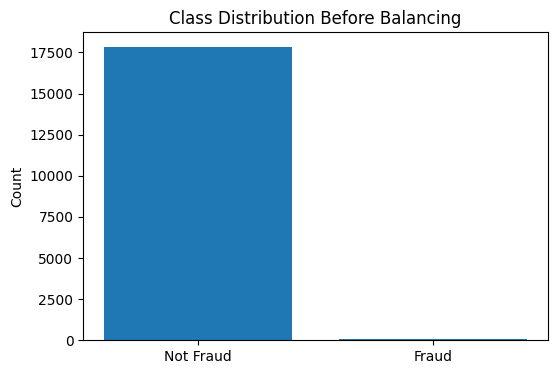

In [6]:
class_counts = y.value_counts()

plt.figure(figsize=(6,4))
plt.bar(['Not Fraud', 'Fraud'], class_counts.sort_index())
plt.title('Class Distribution Before Balancing')
plt.ylabel('Count')
plt.show()

In [7]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y,
    random_state=42
)

In [8]:
smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train, y_train)

model_bal = LogisticRegression(max_iter=1000)
model_bal.fit(X_train_bal, y_train_bal)

LogisticRegression(max_iter=1000)

In [9]:
y_pred_bal = model_bal.predict(X_test)

balanced_accuracy = accuracy_score(y_test, y_pred_bal)
print("Balanced Model Accuracy:", balanced_accuracy)
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_bal))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_bal))


Balanced Model Accuracy: 0.5499441964285714

Confusion Matrix:
[[1964 1604]
 [   9    7]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.55      0.71      3568
           1       0.00      0.44      0.01        16

    accuracy                           0.55      3584
   macro avg       0.50      0.49      0.36      3584
weighted avg       0.99      0.55      0.71      3584



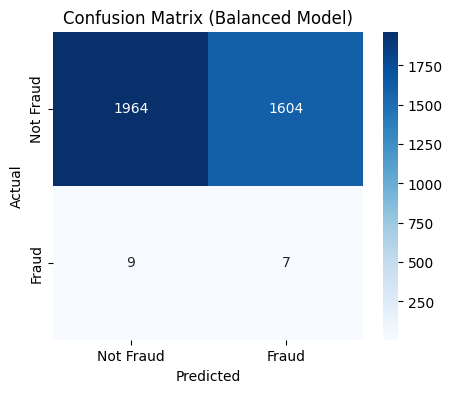

In [10]:
cm = confusion_matrix(y_test, y_pred_bal)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Fraud', 'Fraud'],
            yticklabels=['Not Fraud', 'Fraud'])
plt.title('Confusion Matrix (Balanced Model)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

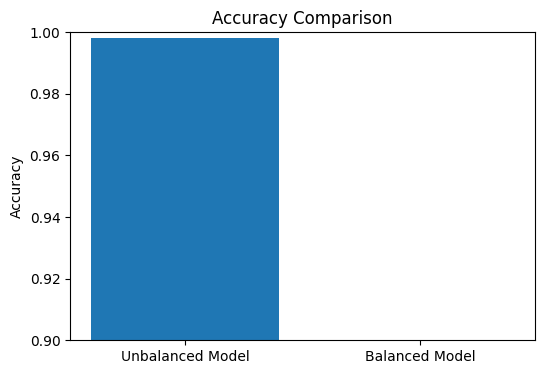

In [11]:
unbalanced_accuracy = 0.998  # example: replace with YOUR actual result

plt.figure(figsize=(6,4))
plt.bar(
    ['Unbalanced Model', 'Balanced Model'],
    [unbalanced_accuracy, balanced_accuracy]
)
plt.title('Accuracy Comparison')
plt.ylabel('Accuracy')
plt.ylim(0.9, 1.0)
plt.show()